### Clustering to Enhance UI

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Normalization

##### (Use Google OpenRefine for large datasets)

In [235]:
data = [{'name' : 'Goku Mohandas', 'Company' : 'Split Inc.'}, {'name' : 'Anshul Bansal', 'Company' : 'ZS LLC'}, 
        {'name' : 'Mohandas Mariappan', 'Company' : 'EY'}, {'name' : 'Andy Pittman', 'Company' : 'Pindrop Securities, Inc.'}]

transforms = [(', Inc.', ''), (', Inc', ''), (', LLC', ''), (', LLP', ''),
               ('LLC', ''), ('Inc.', ''), ('Inc', '')]

In [236]:
contacts = [row for row in data]
companies = [c['Company'].strip() for c in contacts if c['Company'].strip() != ""]

In [238]:
for i, comp in enumerate(companies):
    for transform in transforms:
        companies[i] = companies[i].replace(*transform)

In [239]:
print companies

['Split ', 'ZS ', 'EY', 'Pindrop Securities']


### Geographic Normalization

In [1]:
from geopy import geocoders

In [241]:
GEO_APP_KEY = ' 6d2Gq9fZf5rRfLlCm421~oZfRuXRhxSAobttPoRYyDg~AhXjl-TViSBgP2xDERPW_wnGHCOGy9OeKICF1PXO8-7jy8pXp2ojld4aSv6TJYwe'

In [275]:
g = geocoders.Bing(GEO_APP_KEY)
locations = g.geocode("West Windsor", exactly_one=False)
print locations

[Location((40.3041496277, -74.6323699951, 0.0)), Location((43.4674491882, -72.4719772339, 0.0)), Location((42.6473388672, -84.6936416626, 0.0)), Location((-26.1228408813, 27.9659099579, 0.0)), Location((51.4819908142, -0.612169981003, 0.0))]


In [273]:
for location in locations:
    print location

West Windsor Township, NJ, United States
West Windsor, VT, United States
West Windsor, MI, United States
Windsor West, Gauteng, South Africa
Windsor, England, United Kingdom


In [264]:
reverseLookUp = geocoders.Nominatim()
location = reverseLookUp.reverse("33.7483100891, -84.3911132812")
print location.raw['address']['city'], location.raw['address']['state'], location.raw['address']['country']

Atlanta Georgia United States of America


### Similarity

In [2]:
import nltk
from nltk.metrics.distance import edit_distance # need to explicity call out these methods for NLTK package
from nltk.metrics import association

In [286]:
# Edit distance : number of insertions, deletions and replacements to go from one word to another
distance = edit_distance("daddy", "bad")
print distance

3


In [305]:
# n-grams is getting all possiblities of words in a n-length string and comparing the common n-grams in
# the two n-length strings in order to determine similarity.

ceo_bigrams = list(nltk.bigrams("Chief Executive Officer".split(), pad_right=True, pad_left=True))
cto_bigrams = list(nltk.bigrams("Chief Technology Officer".split(), pad_right=True, pad_left=True))

print ceo_bigrams
print cto_bigrams

# Similarity
print "Similarity: ", len(set(ceo_bigrams).intersection(set(cto_bigrams)))

[(None, 'Chief'), ('Chief', 'Executive'), ('Executive', 'Officer'), ('Officer', None)]
[(None, 'Chief'), ('Chief', 'Technology'), ('Technology', 'Officer'), ('Officer', None)]
Similarity:  2


In [3]:
# Jaccard Distance
# Ratio of intersection / union = common items / total number of distinct items

from nltk.metrics.distance import jaccard_distance

In [318]:
# 4 / 6
print jaccard_distance(set(ceo_bigrams), set(cto_bigrams))

print jaccard_distance(set("Chief Executive Officer".split()), set("Chief Technology Officer".split()))
print set("Chief Executive Officer".split())

0.666666666667
0.5
set(['Chief', 'Executive', 'Officer'])


### Greedy Clustering

In [5]:
all_titles = ['Chief Technology Officer', 'Chief Executive Officer', 'Chief Analytics Officer', 'Data Scientist',
         'Research Associate', 'Vice President', 'Senior Managing Officer', 'Intern', 'Research Associate',
         'Software Engineer', 'Materials Engineer']

In [7]:
clusters = {}
THRESHOLD = 0.5
for title1 in all_titles:
    clusters[title1] = [] 
    for title2 in all_titles:
        if title2 in clusters[title1] or clusters.has_key(title2) and title1 in clusters[title2]:
            continue
        distance = jaccard_distance(set(title1.split()), set(title2.split())) 
        if distance <= THRESHOLD:
            clusters[title1].append(title2)

In [8]:
print clusters

{'Chief Technology Officer': ['Chief Technology Officer', 'Chief Executive Officer', 'Chief Analytics Officer'], 'Vice President': ['Vice President'], 'Data Scientist': ['Data Scientist'], 'Materials Engineer': ['Materials Engineer'], 'Chief Analytics Officer': ['Chief Analytics Officer'], 'Intern': ['Intern'], 'Chief Executive Officer': ['Chief Executive Officer', 'Chief Analytics Officer'], 'Senior Managing Officer': ['Senior Managing Officer'], 'Research Associate': ['Research Associate'], 'Software Engineer': ['Software Engineer']}


### KMeans Clustering

In [51]:
from scipy.cluster.vq import kmeans, vq 
import matplotlib.pyplot as plt
import numpy as np

In [22]:
x1 = np.array([1.0, 2.0, 3.0, 1.0, 5.0, 6.0, 5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 7.0, 9.0])
x2 = np.array([1.0, 3.0, 2.0, 2.0, 8.0, 6.0, 7.0, 6.0, 7.0, 1.0, 2.0, 1.0, 1.0, 3.0])
X = np.array(zip(x1, x2)).reshape(len(x1), 2) # zip('ABCD', 'xy') --> Ax By

In [45]:
centers, avg_distortion = kmeans(X, 3)
labels, distortions_array = vq(X, centers)

In [49]:
distortions = {}
for i in range(1, 10):
    centers, avg_distortion = kmeans(X, i)
    distortions[i] = avg_distortion

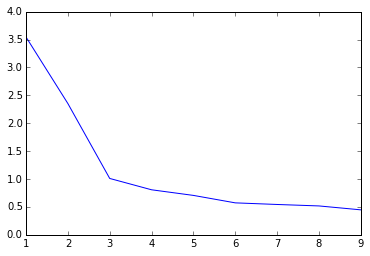

In [57]:
K = distortions.keys()
meanDistortions = [distortions[k] for k in K]
plt.plot(K, meanDistortions)
plt.show()